In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib notebook

import seaborn as sns

In [2]:
plt.style.use("seaborn-colorblind")

In [3]:
data = pd.read_csv("C:/Users/VARUN/Desktop/AirPollution/Dataset/cpcb_dly_aq_maharashtra-2014.csv")

In [4]:
data.head()

,Stn Code,Sampling Date,State,City/Town/Village/Area,Location of Monitoring Station,Agency,Type of Location,SO2,NO2,RSPM/PM10,PM 2.5
0,702,01-03-14,Maharashtra,Akola,"College Of Engineering and Technology, Akola",Maharashtra State Pollution Control Board,"Residential, Rural and other Areas",8.0,10.0,158.0,NaN
1,702,01-04-14,Maharashtra,Akola,"College Of Engineering and Technology, Akola",Maharashtra State Pollution Control Board,"Residential, Rural and other Areas",8.0,9.0,160.0,NaN
2,702,01-10-14,Maharashtra,Akola,"College Of Engineering and Technology, Akola",Maharashtra State Pollution Control Board,"Residential, Rural and other Areas",8.0,9.0,158.0,NaN
3,702,01-11-14,Maharashtra,Akola,"College Of Engineering and Technology, Akola",Maharashtra State Pollution Control Board,"Residential, Rural and other Areas",8.0,10.0,162.0,NaN
4,702,17-01-14,Maharashtra,Akola,"College Of Engineering and Technology, Akola",Maharashtra State Pollution Control Board,"Residential, Rural and other Areas",9.0,9.0,161.0,NaN


In [5]:
dates = ['-'.join(i.split('-')[1:]) for i in data['Sampling Date']]

In [6]:
data['Sampling Date'] = dates

In [7]:
for i in range(len(data['City/Town/Village/Area'])):
    if data['City/Town/Village/Area'][i] != 'Mumbai':
        data.drop(i, inplace = True)

In [8]:
data.head()

,Stn Code,Sampling Date,State,City/Town/Village/Area,Location of Monitoring Station,Agency,Type of Location,SO2,NO2,RSPM/PM10,PM 2.5
2550,169,03-14,Maharashtra,Mumbai,"Bank of India, Kalbadevi Branch, Kalbadevi, Mu...",National Environmental Engineering Research In...,"Residential, Rural and other Areas",2.0,20.0,179.0,NaN
2551,169,06-14,Maharashtra,Mumbai,"Bank of India, Kalbadevi Branch, Kalbadevi, Mu...",National Environmental Engineering Research In...,"Residential, Rural and other Areas",2.0,20.0,186.0,NaN
2552,169,09-14,Maharashtra,Mumbai,"Bank of India, Kalbadevi Branch, Kalbadevi, Mu...",National Environmental Engineering Research In...,"Residential, Rural and other Areas",6.0,14.0,171.0,NaN
2553,169,01-14,Maharashtra,Mumbai,"Bank of India, Kalbadevi Branch, Kalbadevi, Mu...",National Environmental Engineering Research In...,"Residential, Rural and other Areas",2.0,9.0,130.0,NaN
2554,169,01-14,Maharashtra,Mumbai,"Bank of India, Kalbadevi Branch, Kalbadevi, Mu...",National Environmental Engineering Research In...,"Residential, Rural and other Areas",5.0,20.0,155.0,NaN


In [9]:
data = data.groupby("Sampling Date").mean()
data

,Stn Code,SO2,NO2,RSPM/PM10,PM 2.5
Sampling Date,,,,,
01-14,234.818182,4.409091,21.636364,136.818182,NaN
02-14,237.904762,4.809524,23.428571,107.238095,NaN
03-14,244.250000,4.791667,27.416667,110.625000,NaN
04-14,229.333333,3.944444,21.388889,91.555556,NaN
05-14,214.450000,3.850000,26.600000,74.300000,NaN
06-14,229.333333,4.541667,13.125000,76.333333,NaN
07-14,221.833333,2.375000,11.958333,50.916667,NaN
08-14,246.476190,3.333333,11.952381,75.619048,NaN
09-14,224.086957,3.478261,15.565217,115.695652,NaN


In [10]:
data = data.groupby("Sampling Date").mean().drop("PM 2.5", axis=1)

In [11]:
data

,Stn Code,SO2,NO2,RSPM/PM10
Sampling Date,,,,
01-14,234.818182,4.409091,21.636364,136.818182
02-14,237.904762,4.809524,23.428571,107.238095
03-14,244.250000,4.791667,27.416667,110.625000
04-14,229.333333,3.944444,21.388889,91.555556
05-14,214.450000,3.850000,26.600000,74.300000
06-14,229.333333,4.541667,13.125000,76.333333
07-14,221.833333,2.375000,11.958333,50.916667
08-14,246.476190,3.333333,11.952381,75.619048
09-14,224.086957,3.478261,15.565217,115.695652


<IPython.core.display.Javascript object>


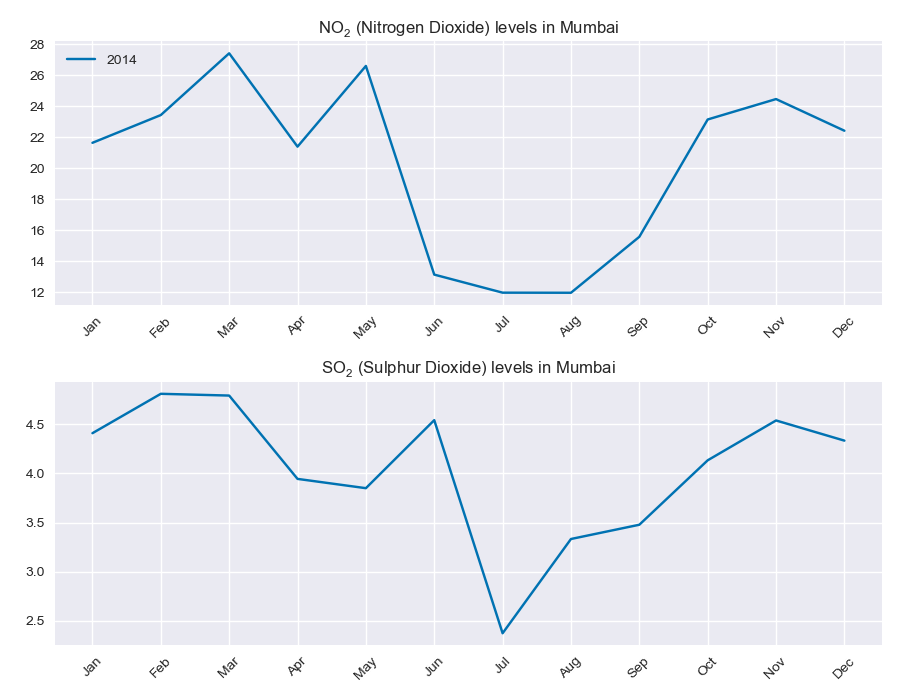

In [12]:
plt.figure(figsize=(9, 7))
plt.subplot(211)
plt.cla()
plotter = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun','Jul', 'Aug', 'Sep',
           'Oct', 'Nov', 'Dec']
x = np.arange(0,len(data["NO2"]),1)
ax = plt.gca()
ax.plot(x, data["NO2"])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticks(x)
plt.xticks(rotation=45)
plt.subplots_adjust(bottom=0.2)
plt.legend([2014],loc=2)
plt.title("$\mathregular{NO_2}$ (Nitrogen Dioxide) levels in Mumbai")
ax.set_xticklabels(plotter)

plt.subplot(212)
plt.cla()
plotter = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun','Jul', 'Aug', 'Sep',
           'Oct', 'Nov', 'Dec']
x = np.arange(0,len(data["SO2"]),1)
ax = plt.gca()
ax.plot(x, data["SO2"])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticks(x)
plt.xticks(rotation=45)
plt.title("$\mathregular{SO_2}$ (Sulphur Dioxide) levels in Mumbai")
ax.set_xticklabels(plotter)

plt.tight_layout()
#plt.show()